## Context
- Preprocessing
- Regression Model

#### 참고 자료
- Mean Absolute Error: https://chukycheese.github.io/translation/statistics/absolute-error-and-mean-absolute-error/
- Numpy Documentation: https://numpy.org/doc/stable/
- Pandas Documentation: https://pandas.pydata.org/docs/reference/index.html
- Scikit-learn Documentation: https://scikit-learn.org/stable/user_guide.html

### 과제 설명

#### 사용할 데이터 경로
1. data/MDC05/...

In [39]:
import warnings
warnings.filterwarnings(action='ignore')

from os.path import join
import pandas as pd
import numpy  as np
import multiprocessing

n_cpus = multiprocessing.cpu_count()
train_path = join('../data', 'MDC05', 'train.csv')
test_path  = join('../data', 'MDC05', 'test.csv')

In [40]:
data   = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)

label = data[['hhb', 'hbo2', 'ca', 'na']]

data.drop(columns=['id', 'hhb', 'hbo2', 'ca', 'na'], inplace=True)
x_test.drop(columns=['id'], inplace=True)

In [41]:
# DF.info에서 Object type을 가진 컬럼은 모두 범주형 변수
# Python 내장 함수 zip은 2개의 리스트를 묶어 병렬로 사용할 수 있도록 해줍니다.
# data.dtypes에 들어있는 각 컬럼의 type 값이 'O'이면 범주형 변수이므로 해당 값이 'O'인 경우 범주형 컬럼 리스트에 추가합니다.
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
[]

 Numeric Columns: 
['rho', '650_src', '660_src', '670_src', '680_src', '690_src', '700_src', '710_src', '720_src', '730_src', '740_src', '750_src', '760_src', '770_src', '780_src', '790_src', '800_src', '810_src', '820_src', '830_src', '840_src', '850_src', '860_src', '870_src', '880_src', '890_src', '900_src', '910_src', '920_src', '930_src', '940_src', '950_src', '960_src', '970_src', '980_src', '990_src', '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst', '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst', '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst', '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst', '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst', '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']



In [42]:
data.head()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN


In [43]:
data.describe()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8.001000e+03,7.970000e+03,7.962000e+03,8.022000e+03,7.982000e+03,7.987000e+03,7.992000e+03,7.931000e+03,8.081000e+03,8.013000e+03
mean,17.568000,0.180212,0.203529,0.229804,0.259158,0.289975,0.322244,0.354101,0.384492,0.412503,...,7.976805e-11,6.761949e-11,6.687656e-11,8.491835e-11,7.511190e-11,4.270426e-11,2.498465e-11,4.047717e-11,1.153774e-10,2.364072e-10
std,5.595847,0.272859,0.288661,0.306340,0.324849,0.342362,0.357700,0.370451,0.379054,0.382319,...,3.778529e-10,3.336177e-10,3.453981e-10,4.335765e-10,3.831916e-10,2.293432e-10,1.639150e-10,2.134495e-10,5.179299e-10,1.058272e-09
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,15.000000,0.007318,0.009520,0.011270,0.013728,0.016350,0.019510,0.026217,0.037235,0.050185,...,3.501349e-19,1.019189e-19,7.604346e-20,3.993014e-19,1.574964e-19,0.000000e+00,0.000000e+00,0.000000e+00,5.669218e-18,6.574627e-17
50%,20.000000,0.052025,0.064600,0.078565,0.095355,0.119635,0.148590,0.181905,0.219260,0.270145,...,1.067215e-15,6.275528e-16,4.799711e-16,1.149284e-15,6.566552e-16,8.391564e-17,2.525680e-17,1.231848e-16,3.395726e-15,1.717923e-14
75%,25.000000,0.221117,0.276952,0.339075,0.417478,0.510915,0.607150,0.698085,0.781490,0.835673,...,1.168691e-12,9.884604e-13,8.891546e-13,1.224508e-12,9.503366e-13,3.186890e-13,1.234955e-13,2.958971e-13,2.392410e-12,6.942183e-12
max,25.000000,1.019990,1.019970,1.019930,1.019880,1.020000,1.019970,1.019970,1.019940,1.019990,...,1.167515e-08,1.215034e-08,1.288854e-08,1.400634e-08,1.343132e-08,6.461523e-09,5.773867e-09,5.529940e-09,1.013262e-08,2.682289e-08


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rho      10000 non-null  int64  
 1   650_src  10000 non-null  float64
 2   660_src  10000 non-null  float64
 3   670_src  10000 non-null  float64
 4   680_src  10000 non-null  float64
 5   690_src  10000 non-null  float64
 6   700_src  10000 non-null  float64
 7   710_src  10000 non-null  float64
 8   720_src  10000 non-null  float64
 9   730_src  10000 non-null  float64
 10  740_src  10000 non-null  float64
 11  750_src  10000 non-null  float64
 12  760_src  10000 non-null  float64
 13  770_src  10000 non-null  float64
 14  780_src  10000 non-null  float64
 15  790_src  10000 non-null  float64
 16  800_src  10000 non-null  float64
 17  810_src  10000 non-null  float64
 18  820_src  10000 non-null  float64
 19  830_src  10000 non-null  float64
 20  840_src  10000 non-null  float64
 21  850_src  1000

In [13]:
x_test.head()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,0.90815,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,0.98678,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,1.01261,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,0.51432,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,0.00000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [14]:
x_test.describe()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8.024000e+03,8.081000e+03,8.019000e+03,8.000000e+03,8.001000e+03,8.051000e+03,7.980000e+03,8.024000e+03,7.989000e+03,8.030000e+03
mean,17.495500,0.180019,0.203678,0.230319,0.259816,0.291496,0.323884,0.356673,0.387589,0.416070,...,7.715626e-11,6.983341e-11,6.524223e-11,8.246489e-11,7.597039e-11,4.429934e-11,2.662845e-11,4.542480e-11,1.197293e-10,2.499737e-10
std,5.615882,0.270866,0.286827,0.304553,0.323496,0.341311,0.357078,0.369559,0.378026,0.382696,...,3.510083e-10,3.129258e-10,2.928428e-10,3.612487e-10,3.760606e-10,2.404518e-10,1.729574e-10,2.831147e-10,5.361285e-10,1.047715e-09
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,0.007568,0.009725,0.012220,0.013337,0.016260,0.018985,0.026252,0.036335,0.050720,...,3.239118e-19,1.198502e-19,1.091996e-19,4.782415e-19,1.697161e-19,0.000000e+00,0.000000e+00,0.000000e+00,6.932872e-18,5.740387e-17
50%,15.000000,0.053375,0.066420,0.082290,0.099510,0.123550,0.151360,0.188430,0.229180,0.278660,...,1.342652e-15,7.029654e-16,5.635045e-16,1.552119e-15,8.890709e-16,1.289191e-16,2.217595e-17,1.576788e-16,4.863574e-15,2.135066e-14
75%,25.000000,0.225513,0.278710,0.342330,0.422447,0.512260,0.606375,0.698940,0.783555,0.838735,...,1.655310e-12,1.355777e-12,1.098150e-12,1.542382e-12,1.332899e-12,4.245411e-13,1.387875e-13,3.854661e-13,2.749760e-12,7.590586e-12
max,25.000000,1.019930,1.019950,1.019840,1.019890,1.019900,1.019920,1.020000,1.019890,1.019960,...,9.353462e-09,8.654387e-09,7.744030e-09,9.627488e-09,1.481643e-08,6.492176e-09,5.715315e-09,9.173911e-09,1.390299e-08,2.156264e-08


In [15]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rho      10000 non-null  int64  
 1   650_src  10000 non-null  float64
 2   660_src  10000 non-null  float64
 3   670_src  10000 non-null  float64
 4   680_src  10000 non-null  float64
 5   690_src  10000 non-null  float64
 6   700_src  10000 non-null  float64
 7   710_src  10000 non-null  float64
 8   720_src  10000 non-null  float64
 9   730_src  10000 non-null  float64
 10  740_src  10000 non-null  float64
 11  750_src  10000 non-null  float64
 12  760_src  10000 non-null  float64
 13  770_src  10000 non-null  float64
 14  780_src  10000 non-null  float64
 15  790_src  10000 non-null  float64
 16  800_src  10000 non-null  float64
 17  810_src  10000 non-null  float64
 18  820_src  10000 non-null  float64
 19  830_src  10000 non-null  float64
 20  840_src  10000 non-null  float64
 21  850_src  1000

#### 1. 전처리
"data/MDC05" 경로에 있는 데이터를 사용해 Train, Valid, Test 데이터셋을 만들고, 결측치 처리 -> 스케일링 -> 인코딩 순서로 전처리를 진행합니다.<br>
수업 시간에 배웠던대로 모델 학습에 사용할 Train 데이터 셋에는 Valid, Test 데이터셋의 정보가 유출되지 않도록 주의합니다.

In [16]:
import missingno as msno

<AxesSubplot:>

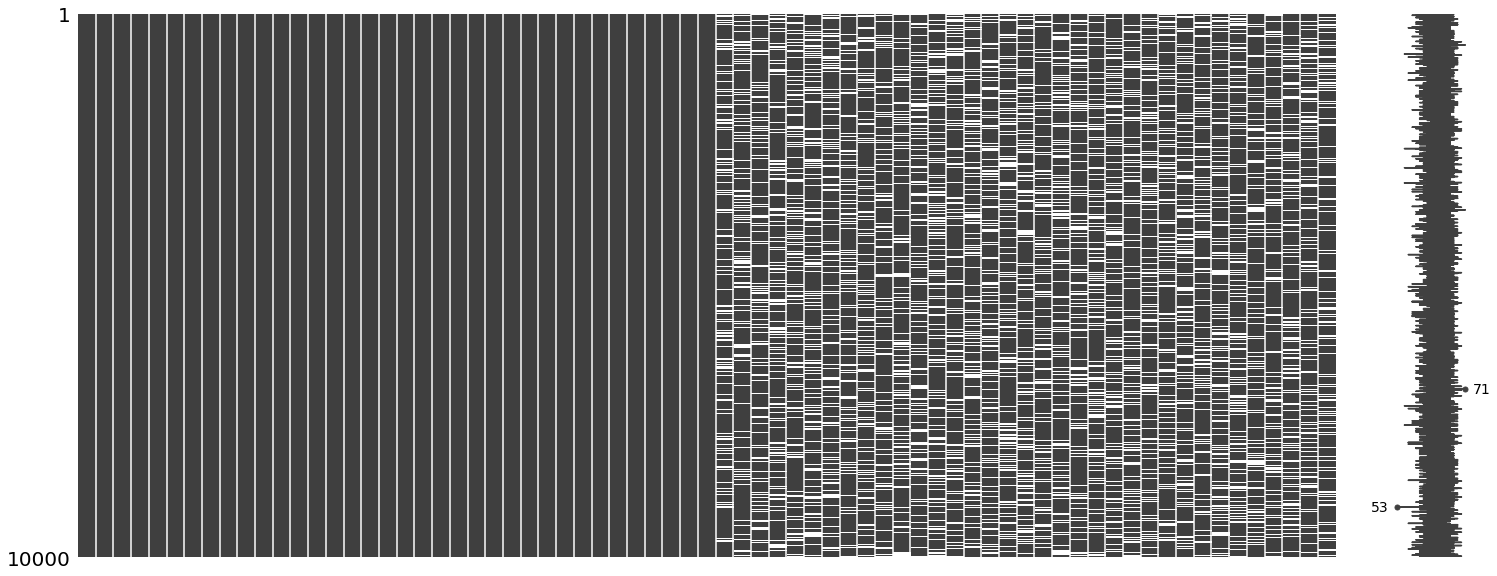

In [17]:
msno.matrix(data)

<AxesSubplot:>

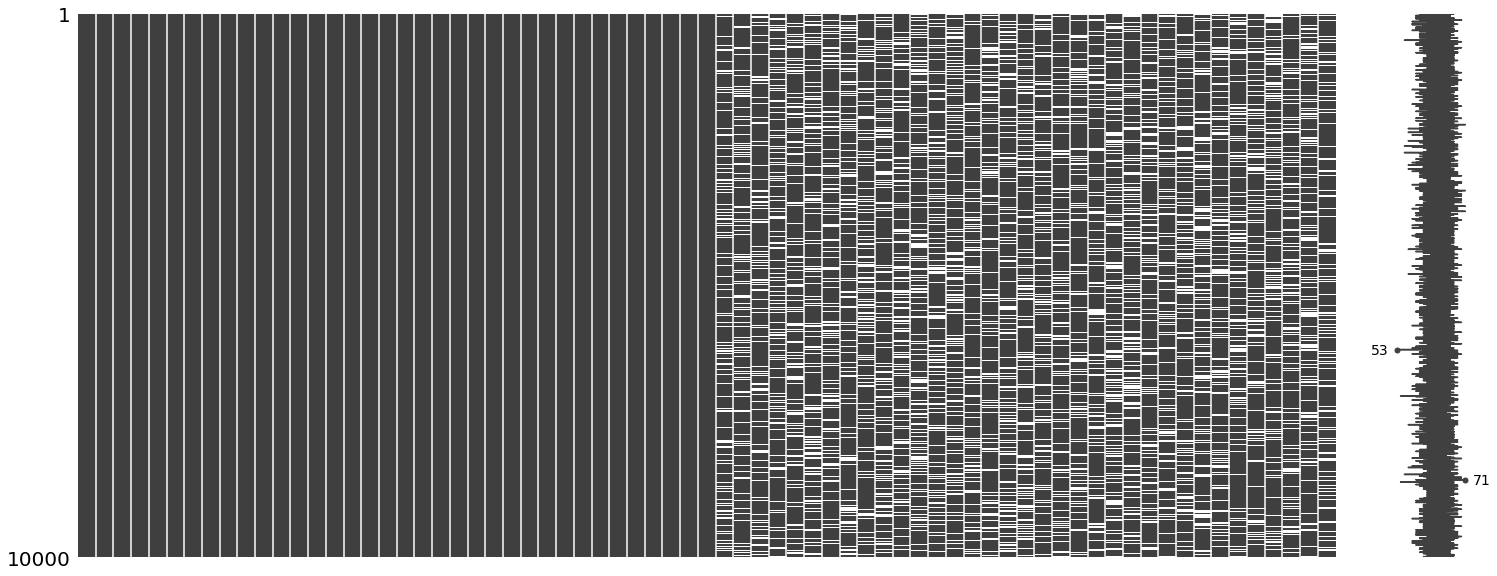

In [18]:
msno.matrix(x_test)

##### 수치형 변수들의 결측치 확인

In [19]:
pd.isna(data[num_columns]).sum().sum()

70168

In [20]:
pd.isna(x_test[num_columns]).sum().sum()

70000

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(data, label, 
                                                      test_size=0.3,
                                                      random_state=42,
                                                      shuffle=True)

In [23]:
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)

##### MICE를 이용한 결측치 처리

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
mice = IterativeImputer(random_state=0)
x_train[num_columns] = mice.fit_transform(x_train[num_columns])
x_valid[num_columns] = mice.transform(x_valid[num_columns])
x_test[num_columns]  = mice.transform(x_test[num_columns])

In [26]:
pd.isna(x_train[num_columns]).sum().sum()

0

In [27]:
pd.isna(x_valid[num_columns]).sum().sum()

0

In [28]:
pd.isna(x_test[num_columns]).sum().sum()

0

#### 2. 스케일링

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_valid[num_columns] = scaler.transform(x_valid[num_columns])
x_test[num_columns]  = scaler.transform(x_test[num_columns])

##### 스케일링 확인

In [30]:
x_train[num_columns].describe()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,...,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,2.455813e-16,1.583495e-16,-5.801708e-17,-2.969054e-17,-4.044384e-17,-1.034093e-16,1.748125e-16,1.070414e-16,1.891503e-16,2.547169e-17,...,1.295353e-16,-7.106220e-17,-1.012761e-16,2.270406e-17,8.215650e-17,-1.346304e-16,-2.783408e-16,-4.374279e-17,5.668085e-17,-1.548365e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.350970e+00,-6.681199e-01,-7.139326e-01,-7.596922e-01,-8.074042e-01,-8.571583e-01,-9.115932e-01,-9.663066e-01,-1.024555e+00,-1.090330e+00,...,-7.844732e-01,-1.044211e+00,-7.168802e-01,-7.153976e-01,-7.946083e-01,-1.159105e+00,-1.268202e+00,-7.652614e-01,-7.830143e-01,-8.675704e-01
25%,-4.605002e-01,-6.402714e-01,-6.796026e-01,-7.218984e-01,-7.621444e-01,-8.082895e-01,-8.557072e-01,-8.898126e-01,-9.217252e-01,-9.547786e-01,...,-2.199454e-01,-2.168980e-01,-2.080178e-01,-2.042079e-01,-2.092550e-01,-2.059689e-01,-1.680395e-01,-2.038865e-01,-2.354751e-01,-2.357912e-01
50%,4.299698e-01,-4.686064e-01,-4.787996e-01,-4.977795e-01,-5.032912e-01,-4.973346e-01,-4.835309e-01,-4.595708e-01,-4.206948e-01,-3.518774e-01,...,-2.199320e-01,-2.168860e-01,-2.080097e-01,-2.041975e-01,-2.092479e-01,-2.059669e-01,-1.680388e-01,-2.038839e-01,-2.354572e-01,-2.357485e-01
75%,1.320440e+00,1.701638e-01,2.722196e-01,3.845315e-01,5.126642e-01,6.714952e-01,8.121081e-01,9.359870e-01,1.051946e+00,1.103440e+00,...,-1.127099e-01,-1.011038e-01,-1.145471e-01,-1.266491e-01,-1.199619e-01,-1.261172e-01,-1.180492e-01,-1.329474e-01,-1.693770e-01,-1.597274e-01
max,1.320440e+00,3.078458e+00,2.823885e+00,2.569062e+00,2.325996e+00,2.114550e+00,1.933889e+00,1.781901e+00,1.662095e+00,1.574689e+00,...,3.148778e+01,3.764931e+01,4.054283e+01,3.296595e+01,3.659676e+01,3.027882e+01,3.334467e+01,2.741883e+01,1.990853e+01,2.600322e+01


In [31]:
x_valid[num_columns].describe()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.010516,-0.020098,-0.026612,-0.032263,-0.037029,-0.040094,-0.042018,-0.040723,-0.039184,-0.041824,...,-0.015456,-0.008730,0.008113,-0.009137,-0.004301,0.001754,-0.001153,0.009736,-0.006246,-0.004985
std,0.988535,1.008068,1.003864,0.998987,0.993302,0.992118,0.992361,0.993212,0.994365,0.995780,...,0.747985,0.788253,0.956870,0.757399,0.832610,0.934281,0.972580,0.879372,0.806116,0.821781
min,-1.350970,-0.668120,-0.713933,-0.759692,-0.807404,-0.857158,-0.911593,-0.966307,-1.024555,-1.090330,...,-0.717691,-0.772796,-0.978888,-0.686681,-0.731221,-0.688437,-0.678496,-0.735908,-0.766563,-0.924901
25%,-0.460500,-0.643798,-0.683852,-0.725472,-0.769841,-0.814213,-0.861677,-0.906996,-0.937839,-0.971500,...,-0.219945,-0.216898,-0.208018,-0.204208,-0.209255,-0.205969,-0.168039,-0.203886,-0.235475,-0.235791
50%,0.429970,-0.496381,-0.514768,-0.521050,-0.529516,-0.539624,-0.533607,-0.506521,-0.484994,-0.444475,...,-0.219927,-0.216886,-0.208007,-0.204193,-0.209243,-0.205967,-0.168039,-0.203882,-0.235453,-0.235740
75%,0.429970,0.095252,0.187188,0.265529,0.399169,0.542740,0.694945,0.847092,0.988036,1.049479,...,-0.103262,-0.107591,-0.096606,-0.107147,-0.099916,-0.113797,-0.106110,-0.096111,-0.136930,-0.143716
max,1.320440,3.079266,2.823781,2.567724,2.326304,2.115628,1.930569,1.781793,1.662069,1.573670,...,10.550987,11.344683,30.248711,15.330670,16.475076,27.526977,38.532658,24.314446,15.320502,12.077679


In [32]:
x_test[num_columns].describe()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.016067,-0.006741,-0.007467,-0.007998,-0.009088,-0.007595,-0.008031,-0.005288,-0.003597,-0.003227,...,-0.008543,-0.000932,0.000866,-0.006663,0.000217,0.002532,0.009822,0.020707,0.002598,0.005859
std,1.000155,0.995145,0.994875,0.993971,0.993982,0.994749,0.996167,0.995740,0.995769,0.999904,...,0.869506,0.890219,0.844528,0.781828,0.936056,1.030422,1.045159,1.278282,0.974769,0.940088
min,-1.350970,-0.668120,-0.713933,-0.759692,-0.807404,-0.857158,-0.911593,-0.966307,-1.024555,-1.090330,...,-0.798233,-0.972129,-0.924231,-0.784783,-0.753897,-0.799652,-1.518001,-0.924654,-0.936827,-0.882977
25%,-1.350970,-0.640317,-0.680201,-0.719810,-0.766423,-0.809769,-0.858629,-0.895572,-0.928844,-0.957809,...,-0.219945,-0.216898,-0.208018,-0.204208,-0.209255,-0.205969,-0.168039,-0.203886,-0.235475,-0.235791
50%,-0.460500,-0.472023,-0.483551,-0.491122,-0.501647,-0.497072,-0.489334,-0.458601,-0.420866,-0.362250,...,-0.219930,-0.216886,-0.208009,-0.204192,-0.209243,-0.205966,-0.168039,-0.203883,-0.235449,-0.235741
75%,1.320440,0.160400,0.252787,0.357573,0.490618,0.635822,0.780054,0.916917,1.039427,1.101108,...,-0.112429,-0.110735,-0.106857,-0.098231,-0.113192,-0.128255,-0.105950,-0.130781,-0.152413,-0.156976
max,1.320440,3.079045,2.823815,2.568769,2.326334,2.115337,1.933749,1.781982,1.661963,1.574611,...,25.182470,26.754275,24.276977,22.595835,40.392395,30.423441,38.140193,45.620913,27.404154,20.857478


In [33]:
label_columns = label.columns
label_columns

Index(['hhb', 'hbo2', 'ca', 'na'], dtype='object')

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

models = [['Linear Regression', LinearRegression(n_jobs=n_cpus)], 
          ['MultiLayerPerceptron', MLPRegressor(random_state=42)],
          ['RandomForest', RandomForestRegressor(random_state=42,
                                                 n_jobs=n_cpus)], 
          ['XGBoost', XGBRegressor(random_state=42,
                                   n_jobs=n_cpus)], 
          ['LightGBM', LGBMRegressor(random_state=42,
                                     n_jobs=n_cpus)]]


best_loss = np.inf
best_pred = None
for i, (name, model) in enumerate(models):
    current_loss = list()
    current_pred = list()
    for c_label in label_columns:
        model.fit(x_train, y_train[c_label])
        y_pred = model.predict(x_valid)
        current_loss.append(mean_absolute_error(y_valid[c_label], y_pred))
        current_pred.append(model.predict(x_test))
        
    if np.mean(current_loss) < best_loss:
        best_loss  = np.mean(current_loss)
        best_model = [i, name]
        best_pred  = current_pred
    
    print(f'{name} Model Validation Mean Absolute Error: {np.mean(current_loss)}')

print(f'Best Model: {best_model[-1]}, Mean Absolute Error: {best_loss}')

Linear Regression Model Validation Mean Absolute Error: 1.7446166717597402
MultiLayerPerceptron Model Validation Mean Absolute Error: 1.6864081778332083
RandomForest Model Validation Mean Absolute Error: 1.3995763416666667
XGBoost Model Validation Mean Absolute Error: 1.3953188141176258
LightGBM Model Validation Mean Absolute Error: 1.319902113767467
Best Model: LightGBM, Mean Absolute Error: 1.319902113767467


In [36]:
submit_path = join('../data', 'MDC05', 'sample_submission.csv')
submit = pd.read_csv(submit_path)

In [37]:
y_test_hhb, y_test_hbo2, y_test_ca, y_test_na = best_pred

In [38]:
# y_test_hhb, y_test_hbo2, y_test_ca, y_test_na는 가장 성능이 좋은 모델의 4개 라벨에 대한 예측 값을 담고 있습니다.
submit['hhb']  = y_test_hhb
submit['hbo2'] = y_test_hbo2
submit['ca']   = y_test_ca
submit['na']   = y_test_na

submit_file_name = 'MDC05_first.csv'
submit.to_csv(submit_file_name, index=False)